# Analyzing the Difference and Scale of Imports and Exports

Data originally comes from [https://wits.worldbank.org/witsapiintro.aspx]

Prereqs:
* Need to run the RetrieveData notebook in the WITS_Data directory to create the input CSV file used for this analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Fetching the data created from the WITS data store and saved in a CSV file.  We fetch the range of years for which we have
data so that if we add another year of data, it will work without change.  Notice how I create a relative path to the data
(including referencing the parent directory) without using operating system dependencies.

In [2]:
datafile_path = os.path.join(os.pardir,'WITS_Data','trade_data_file.csv')

data_df = pd.read_csv(datafile_path)

min_year = data_df['Year'].min()
max_year = data_df['Year'].max()

print(f"First year in data is {min_year}, and last year in data is {max_year}")

data_df.head(10)

First year in data is 2000, and last year in data is 2017


,Year,Partner,Imports,Exports,Difference,Scale
0,2000,MEX,135.923121,111.338635,24.584486,22.080822
1,2000,CAN,230.816138,178.919985,51.896152,29.005230
2,2000,RUS,7.658130,2.092380,5.565750,266.000901
3,2000,JPN,146.479387,64.921645,81.557742,125.624884
4,2000,KOR,40.307624,27.829956,12.477668,44.835387
5,2000,CHN,100.012903,16.184679,83.828223,517.948004
6,2000,WLD,1217.932974,781.830673,436.102302,55.779636
7,2000,EU,163.543932,116.362492,47.181440,40.546949
8,2000,Other,393.191740,264.180900,129.010840,48.834280
9,2001,MEX,131.334695,101.295130,30.039565,29.655487


Create a new DataFrame removing the WLD (total) rows.  All the other rows sum up to WLD row values anyway. 

In [3]:
all_df = data_df[data_df.Partner != 'WLD']
all_df.head(10)

,Year,Partner,Imports,Exports,Difference,Scale
0,2000,MEX,135.923121,111.338635,24.584486,22.080822
1,2000,CAN,230.816138,178.919985,51.896152,29.005230
2,2000,RUS,7.658130,2.092380,5.565750,266.000901
3,2000,JPN,146.479387,64.921645,81.557742,125.624884
4,2000,KOR,40.307624,27.829956,12.477668,44.835387
5,2000,CHN,100.012903,16.184679,83.828223,517.948004
7,2000,EU,163.543932,116.362492,47.181440,40.546949
8,2000,Other,393.191740,264.180900,129.010840,48.834280
9,2001,MEX,131.334695,101.295130,30.039565,29.655487
10,2001,CAN,216.234127,163.421117,52.813010,32.317127


Create a new DataFrame with the Other rows removed. Now only the rows with Partners of interest are part of this new
DataFrame

In [4]:
select_df = all_df[all_df.Partner != 'Other']
select_df.head(10)

,Year,Partner,Imports,Exports,Difference,Scale
0,2000,MEX,135.923121,111.338635,24.584486,22.080822
1,2000,CAN,230.816138,178.919985,51.896152,29.005230
2,2000,RUS,7.658130,2.092380,5.565750,266.000901
3,2000,JPN,146.479387,64.921645,81.557742,125.624884
4,2000,KOR,40.307624,27.829956,12.477668,44.835387
5,2000,CHN,100.012903,16.184679,83.828223,517.948004
7,2000,EU,163.543932,116.362492,47.181440,40.546949
9,2001,MEX,131.334695,101.295130,30.039565,29.655487
10,2001,CAN,216.234127,163.421117,52.813010,32.317127
11,2001,RUS,6.264073,2.716088,3.547984,130.628456


Plot imports of the partners of interest

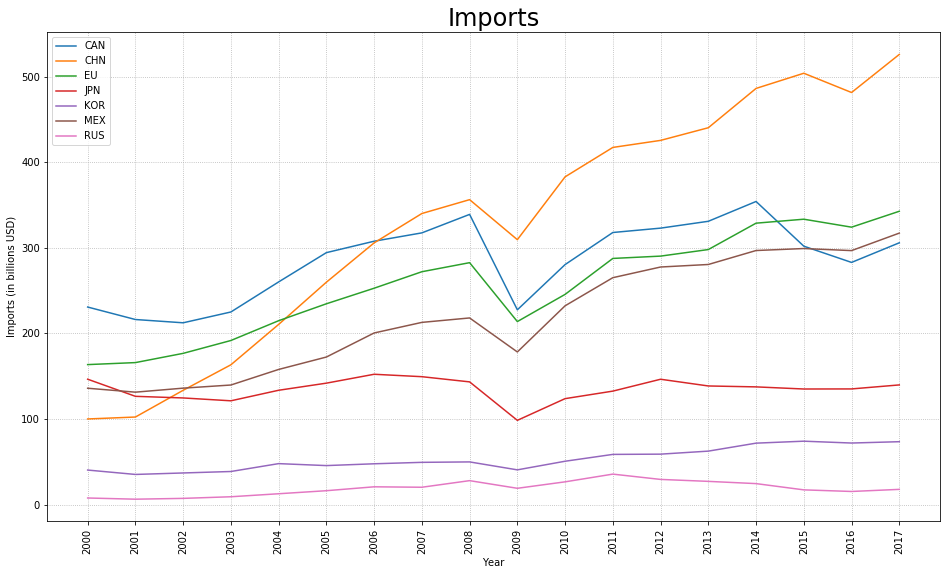

In [5]:
# plot groupby results on the same canvas 
fig_import, ax_import = plt.subplots(figsize=(16,9))

for name, group in select_df.groupby('Partner'):
    group.plot(x='Year', y='Imports', ax=ax_import, label=name)

ax_import.grid(linestyle=':')

plt.xticks(np.arange(min_year, max_year+1, 1), rotation=90)
plt.title('Imports', fontsize=24)
plt.ylabel('Imports (in billions USD)')
plt.show()

Plot exports of the partners of interest

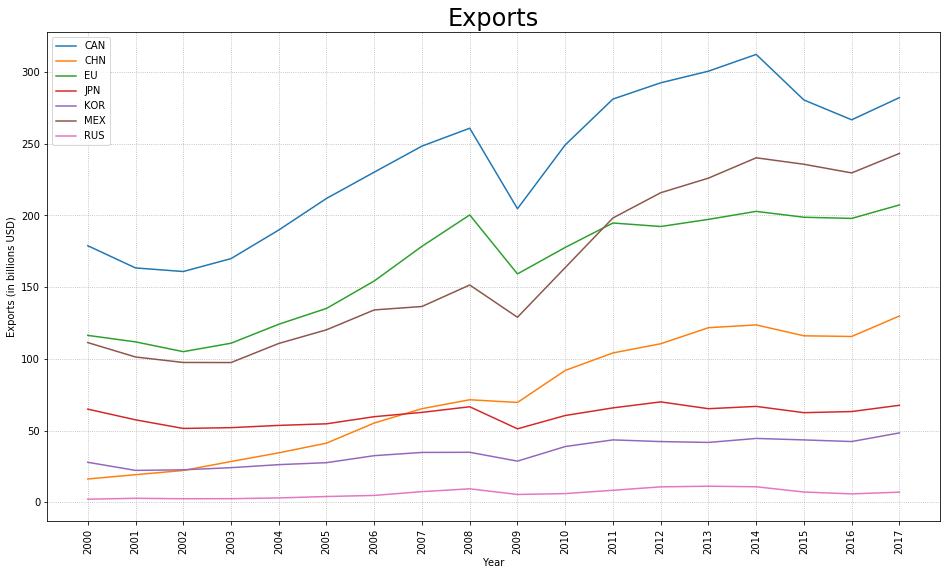

In [6]:
fig_export, ax_export = plt.subplots(figsize=(16,9))

for name, group in select_df.groupby('Partner'):
    group.plot(x='Year', y='Exports', ax=ax_export, label=name)

ax_export.grid(linestyle=':')

plt.xticks(np.arange(min_year, max_year+1, 1), rotation=90)
plt.title('Exports', fontsize=24)
plt.ylabel(('Exports (in billions USD)'))
plt.show()

Plot the differences between the imports and exports of the partners of interest

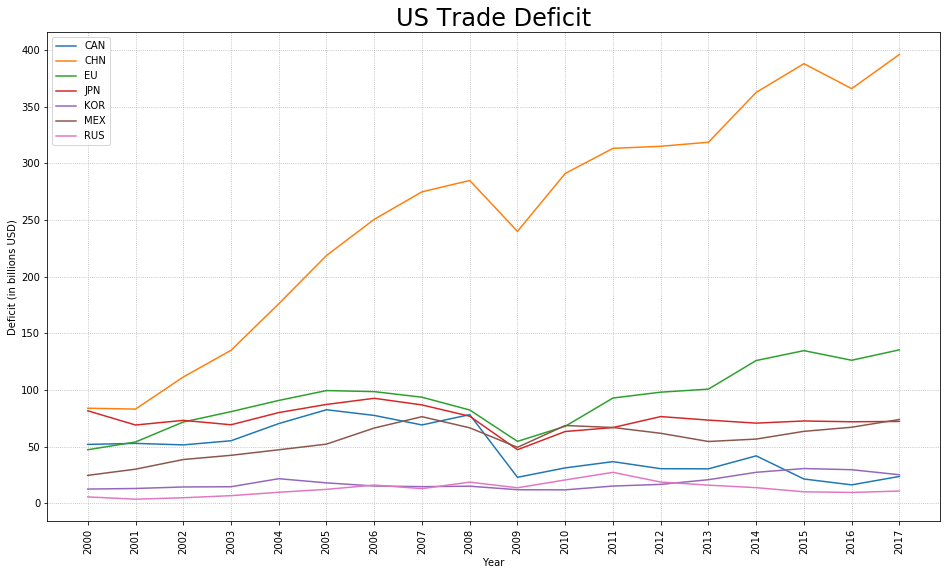

In [7]:
fig_diff, ax_diff = plt.subplots(figsize=(16,9))

for name, group in select_df.groupby('Partner'):
    group.plot(x='Year', y='Difference', ax=ax_diff, label=name)

ax_diff.grid(linestyle=':')

plt.xticks(np.arange(min_year, max_year+1, 1), rotation=90)
plt.title('US Trade Deficit', fontsize=24)
plt.ylabel('Deficit (in billions USD)')
plt.show()

Plot by what percentage imports are greater than exports of the partners of interest

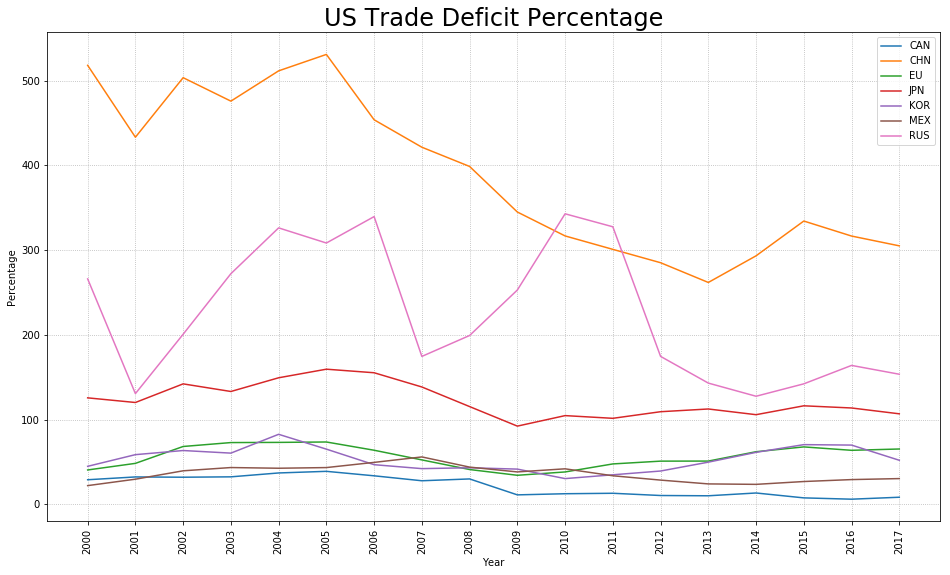

In [8]:
fig_scale, ax_scale = plt.subplots(figsize=(16,9))

for name, group in select_df.groupby('Partner'):
    group.plot(x='Year', y='Scale', ax=ax_scale, label=name)

ax_scale.grid(linestyle=':')

plt.xticks(np.arange(min_year, max_year+1, 1), rotation=90)
plt.title('US Trade Deficit Percentage', fontsize=24)
plt.ylabel('Percentage')
plt.show()

We can see that the differences between imports and exports are constantly growing but is there any partner of interest where
a larger percentage of imports versus exports has been increasing compared to the other partners?  Let's do a percentage
stacked bar chart to answer that question.

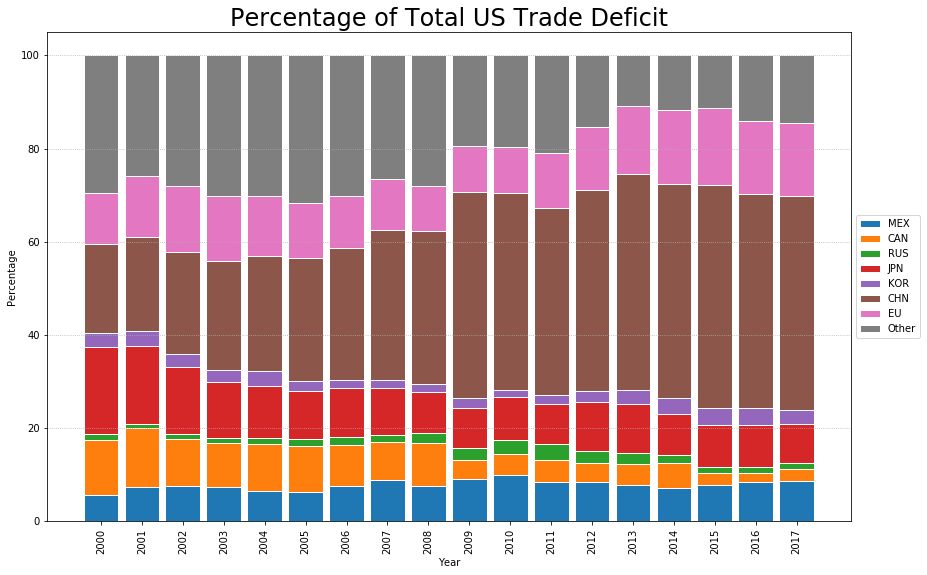

In [10]:
# Data
another_partner_list = all_df.Partner.unique().tolist()
partner_pct_dict = {}

WLD_df = data_df[data_df.Partner == 'WLD']

# From raw value to percentage
for partner in another_partner_list:
    partner_df = data_df[data_df.Partner == partner]
    partner_pct_dict[partner] = [i * 100 / j for i,j in zip(partner_df['Difference'], WLD_df['Difference'])]
 
# plot
barWidth = 0.85

year_list   = [year for year in np.arange(min_year, max_year+1, 1)]
bottom_list = [0.0  for year in year_list]

fig_diff_stacked, ax_diff_stacked = plt.subplots(figsize=(16,9))

ax_diff_stacked.grid(linestyle=':',axis='y')

for partner in another_partner_list:
    ax_diff_stacked.bar(year_list, partner_pct_dict[partner], bottom=bottom_list, edgecolor='white', width=barWidth, label=partner)
    bottom_list = [i+j for i,j in zip(bottom_list, partner_pct_dict[partner])]
 
# Shrink current axis by 10%
box = ax_diff_stacked.get_position()
ax_diff_stacked.set_position([box.x0, box.y0, box.width * 0.9, box.height])

# Put a legend to the right of the current axis
ax_diff_stacked.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Custom x axis
plt.xticks(year_list, rotation=90)
plt.xlabel("Year")
plt.title('Percentage of Total US Trade Deficit', fontsize=24)
plt.ylabel('Percentage')

# Show graphic
plt.show()